# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 6. Feature Engineering. Cohort Analysis


## Раздел 1. Feature Engineering

Сегодня мы закрываем долг перед EDA по Feature Engineering, поскольку на текущий момент это последний неразобранный нами этап из огромной процедуры первичной предобработки данных. В целом, процесс Feature Engineering'a, традиционно выделяющийся как последний и самый обособленный этап в рамках EDA — а иногда и вовсе выносимый за рамки EDA как полностью самостоятельный процесс, — зачастую оказывается одним из самых «благодарных» занятий в анализе данных по соотношению: усилия/вклад в результат.

Для начала, пожалуй, давайте вспомним, из чего же состоит этот этап:

* __[Создание новых признаков, Feature Extraction & Feature Transformation](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)__: процесс, при котором на основе имеющихся данных конструируются новые признаки. Данный процесс может включать изменение непосредственно самих значений, например логарифмирование, взятие корня, или one—hot encoding категориальных признаков, чтобы модель могла такие признаки обработать; это может быть выделение совершенно новых признаков, которые раньше напрямую в данных не содержались; или же это может быть что-то ещё; но в любом случае — в рамках этого процесса всегда подразумевается добавление в набор новых столбцов, полученных тем или иным образом из первоначальных данных.

* __[Выбор признаков, Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)__: процесс выбора наиболее релевантных признаков из имеющихся. При этом остальные признаки удаляются из набора, для того чтобы модель уделила больше внимания и ресурсов первостепенным столбцам с целью увеличения качества алгоритма, а также получения более интерпретируемых результатов. Иными словами, данный процесс представляет собой чистку набора, при которой остаются только наиболее значимые для нашей задачи данные.

В машинном обучении модель обучается целиком на том, что мы подаем ей на вход, так что крайне важно всегда быть уверенным, что необходимые данные для эффективного решения у нас имеются. В случае же если данных, способных обеспечить нужный уровень качества в рамках решения задачи, у нас нет — какой бы ни была хорошей модель, научить мы её ничему дельному, к сожалению, не сможем.

Давайте попробуем теперь перейти от слов к делу и применить принципы Feature Engineering на реальных данных!

Вы еще помните наш прекрасный датасет по энергопотреблению зданий в Нью-Йорке с прошлого семинара, не так ли? :) Предлагаю вернуться к нему и завершить начатое!

### Подготовка данных

Скачаем наш датасет [по ссылке](https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml) и вновь посмотрим на него, чтобы вспомнить, с чем мы работаем!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

%matplotlib inline

#plt.rcParams['font.size'] = 24

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_2/Energy_consumption_NY.csv')
data.sample(3)

Order  Property Id               Property Name  \
7842    9624      4043096          1600 Fulton Street   
10148  12744      2693049  DEPM 1266 - 74-02 43rd Ave   
10665  13356      2975523                        8443   

                        Parent Property Id  \
7842   Not Applicable: Standalone Property   
10148  Not Applicable: Standalone Property   
10665  Not Applicable: Standalone Property   

                      Parent Property Name BBL - 10 digits  \
7842   Not Applicable: Standalone Property      3016990027   
10148  Not Applicable: Standalone Property      4015200005   
10665  Not Applicable: Standalone Property      4033220040   

      NYC Borough, Block and Lot (BBL) self-reported  \
7842                                    3-01699-0027   
10148                                   4-01520-0005   
10665                                     4033220040   

      NYC Building Identification Number (BIN) Address 1 (self-reported)  \
7842                                   3397047        1600 Fulton Street   
10148                                  4037714         74-02 43rd Avenue   
10665                                  2975523        83-43 118TH STREET   

           Address 2 Postal Code Street Number    Street Name   Borough  \
7842   Not Available       11213          1600  FULTON STREET  Brooklyn   
10148  Not Available       11373         74-02      43 AVENUE    Queens   
10665  Not Available       11415         83-57     118 STREET    Queens   

       DOF Gross Floor Area Primary Property Type - Self Selected  \
7842                76980.0                   Multifamily Housing   
10148               72369.0                   Multifamily Housing   
10665              212202.0                   Multifamily Housing   

      List of All Property Use Types at Property Largest Property Use Type  \
7842                         Multifamily Housing       Multifamily Housing   
10148               Multifamily Housing, Parking       Multifamily Housing   
10665                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  \
7842                                               77980   
10148                                              72300   
10665                                             160650   

      2nd Largest Property Use Type  \
7842                  Not Available   
10148                       Parking   
10665                 Not Available   

      2nd Largest Property Use - Gross Floor Area (ft²)  \
7842                                      Not Available   
10148                                              3300   
10665                                     Not Available   

      3rd Largest Property Use Type  \
7842                  Not Available   
10148                 Not Available   
10665                 Not Available   

      3rd Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
7842                                       Not Available            2009   
10148                                      Not Available            1983   
10665                                      Not Available            1940   

       Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
7842                                     1        100         Whole Building   
10148                                    1        100         Whole Building   
10665                                    1        100         Whole Building   

      Metered Areas  (Water) ENERGY STAR Score Site EUI (kBtu/ft²)  \
7842          Whole Building                76                58.4   
10148         Whole Building                72                75.4   
10665         Whole Building               100                   2   

      Weather Normalized Site EUI (kBtu/ft²)  \
7842                                    61.1   
10148                                   79.3   
10665                                      2   

      Weather Normalized Site E

Ниже без дополнительных пояснений проделаем все необходимые преобразования с данными, которые были подробно описаны и рассмотрены нами в рамках EDA на предыдущем семинаре. Конечно, для применения принципов Feature Engineering'a, нельзя обойтись без того, чтобы все предшествующие этапы были уже выполнены (хотя бы до некоторой степени), а потому мы должны их продублировать.

In [ ]:
data = data.replace({'Not Available': np.nan})

part_name_numeric_cols = ['ft²', 'kBtu', 'Metric Tons CO2e', 'kWh', 'therms', 'gal', 'Score']

for col in list(data.columns):
    if any([n_col in col for n_col in part_name_numeric_cols]):
        data[col] = data[col].astype(float)

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
data = data.drop(columns = list(missing_columns))

first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']
iqr = third_quartile - first_quartile

condition = (data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))
data = data[condition]

score_col = data['ENERGY STAR Score']
data.drop('ENERGY STAR Score', axis = 1, inplace = True)
data_src = data.copy()

data = data.fillna(data.mean(numeric_only = True))
data = data.fillna(-1)

data['score'] = score_col
data_src['score'] = score_col

Ну что, в ячейке выше получился минутный пересказ предыдущего семинара :)

Теперь с чистой совестью можем двигаться дальше!

### Преобразование вещественных столбцов

При применении различных математических функций к значениям в наборе, модель машинного обучения способна распознать не только линейные, но и гораздо более сложные зависимости между признаками. [Взятие корня, логарифмирование, возведение в степень и т.д.](https://datascience.stackexchange.com/questions/21650/feature-transformation-on-input-data) — крайне распространенная в науке о данных практика; и её применение может основываться на наших представлениях о поведении и связях между признаками, а также просто на эмпирических наблюдениях за тем, при каких условиях модель работает лучше. Потому очень важным этапом Feature Transformation является работа с числовыми столбцами и приведение их распределений к соответствующему виду.

В рамках наших данных давайте попробуем взять натуральный логарифм от всех числовых признаков.

In [ ]:
%%capture --no-stdout

# Выделим числовые признаки из датасета при помощи функции select_dtypes
numeric_subset = data.select_dtypes('number')

# Добавим столбцы, получающися из колонок из numeric_subset путем взятия натурального логарифма
# Назовем их 'log_<ИМЯ СТОЛБЦА>'
for col in numeric_subset.columns:
    if col == 'score':
        # Пропустим целевой столбец
        continue
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

Посмотрим какого размера у нас получился датасет


In [ ]:
numeric_subset.shape

(11319, 57)

In [ ]:
numeric_subset.head(3)

Order  Property Id  DOF Gross Floor Area  \
12     15      2637863         165328.477352   
17     20      2777309         165328.477352   
18     21      2780056         165328.477352   

    Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
12                                           412503.0         1903   
17                                           323000.0         1907   
18                                           321464.0         1939   

    Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
12                                    2        100                 32.0   
17                                    7        100                120.0   
18                                    2        100                 76.2   

    Weather Normalized Site EUI (kBtu/ft²)  \
12                                82.85971   
17                               125.20000   
18                                79.90000   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
12                                                7.5         
17                                                8.7         
18                                                3.5         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
12                                                0.0            
17                                                0.9            
18                                                0.0            

    Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
12                                138.452467               2047200.0   
17                                193.600000              52441239.4   
18                                106.200000                880200.0   

    Weather Normalized Site Natural Gas Use (therms)  \
12                                           20472.0   
17                                          556997.6   
18                                            8906.3   

    Electricity Use - Grid Purchase (kBtu)  \
12                              11241926.1   
17                              17958140.6   
18                               3968641.7   

    Weather Normalized Site Electricity (kWh)  \
12                                  3249755.2   
17                                  5217062.4   
18                                  1121931.8   

    Total GHG Emissions (Metric Tons CO2e)  \
12                                  1194.0   
17                                  4554.7   
18                                  1893.4   

    Direct GHG Emissions (Metric Tons CO2e)  \
12                                    150.8   
17                                   2888.2   
18                                   1525.1   

    Indirect GHG Emissions (Metric Tons CO2e)  \
12                                     1043.2   
17                                     1666.5   
18                                      368.3   

    Property GFA - Self-Reported (ft²)  Water Use (All Water Sources) (kgal)  \
12                            432503.0                          22061.000000   
17                            598000.0                          14886.625908   
18                            321464.0                           5915.600000   

    Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
12                                       51.01000                   87.9   
17                                      119.02242                  188.7   
18                                       18.40000                  103.3   

     Latitude  Longitude  Community Board  Council District  Census Tract  \
12  40.754453 -73.957023         7.151895         15.793554   4904.651459   
17  40.754453 -73.957023         7.151895         15.793554   4904.651459   
18  40.754453 -73.957023         7.151895         15.793554   4904.651459   

    score  log_Order  log_Property Id  log_DOF Gross Floor Area  \
12   93.0   2.708050        14.785480                  12

После непродолжительного обзора можно заметить, что в данных у нас появились различные странности по типу `inf` и `NaN`, хотя вроде бы уже давно — ещё на этапе чистки — мы удалили все пропуски и другие некорректности из нашего датасета — ну, кроме разве что целевой переменной, которая осталась у нас с пропусками, но тут, очевидно, дело далеко не в ней.

Ну, а в чём же тогда дело?

Оставим пока преобразованные вещественные столбцы в сторонке и перейдем на время к кодированию категориальных. Позже вернёмся и к вещественным.

### Кодирование категориальных столбцов

Ещё одним важнейшим этапом Feature Transformation является кодирование и преобразование категориальных столбцов. Подавляющее большинство моделей и алгоритмов машинного обучения не умеют работать с какими-либо данными, отличными от числовых, а потому при встрече с категориальным столбцом они в лучшем случае просто пропустят данную информацию, а в худшем — вызовут исключение. Разумеется, это не то поведение, которого мы бы хотели.

Одним из эффективных и довольно простых в исполнении способом кодирования строковых столбцов является [One-hot кодирование](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). Данный способ создает для каждой категории интересующего нас категориального признака новый бинарный признак, показывающий по конкретной категории, относится к ней значение или нет. Например, в случае нашего датасета модель не сможет понять, что имеется в виду, когда указано, что здание используется как “офис”; но если мы создадим новый соответствующий признак и присвоим ему значение 1 (данная запись содержит сведения об офисе) и 0 (в противном случае) — то вот это уже будет понятно модели!

Давайте попробуем применить One-hot encoding к двум столбцам датасета: район и тип здания — а затем объединим полученный нами в результате этих трансформаций набор с набором из предыдущего пункта.

Может, это звучит довольно утомительно, но Pandas позволяет это проделать относительно легко!

In [ ]:
# Выберем категориальные признаки ('Borough' и 'Largest Property Use Type')
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# Воспользуемся функцией get_dummies библиотеки pandas для того, чтобы примернить OHE к категориальным колонкам
categorical_subset = pd.get_dummies(categorical_subset)

# Соединим числовые признаки и категориальные
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

Посмотрим, какого размера получился объединенный датасет:

In [ ]:
features.shape

(11319, 111)

В итоге в нашем наборе всё ещё 11,000 записей (зданий), но теперь в нём присутствует 111 колонок (признаков), причем стоит учесть, что нами были закодированы лишь две категориальные переменные, что, по сути, означает, что остальные из них — мы неявно выкинули.

In [ ]:
features.head(3)

Order  Property Id  DOF Gross Floor Area  \
12     15      2637863         165328.477352   
17     20      2777309         165328.477352   
18     21      2780056         165328.477352   

    Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
12                                           412503.0         1903   
17                                           323000.0         1907   
18                                           321464.0         1939   

    Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
12                                    2        100                 32.0   
17                                    7        100                120.0   
18                                    2        100                 76.2   

    Weather Normalized Site EUI (kBtu/ft²)  \
12                                82.85971   
17                               125.20000   
18                                79.90000   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
12                                                7.5         
17                                                8.7         
18                                                3.5         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
12                                                0.0            
17                                                0.9            
18                                                0.0            

    Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
12                                138.452467               2047200.0   
17                                193.600000              52441239.4   
18                                106.200000                880200.0   

    Weather Normalized Site Natural Gas Use (therms)  \
12                                           20472.0   
17                                          556997.6   
18                                            8906.3   

    Electricity Use - Grid Purchase (kBtu)  \
12                              11241926.1   
17                              17958140.6   
18                               3968641.7   

    Weather Normalized Site Electricity (kWh)  \
12                                  3249755.2   
17                                  5217062.4   
18                                  1121931.8   

    Total GHG Emissions (Metric Tons CO2e)  \
12                                  1194.0   
17                                  4554.7   
18                                  1893.4   

    Direct GHG Emissions (Metric Tons CO2e)  \
12                                    150.8   
17                                   2888.2   
18                                   1525.1   

    Indirect GHG Emissions (Metric Tons CO2e)  \
12                                     1043.2   
17                                     1666.5   
18                                      368.3   

    Property GFA - Self-Reported (ft²)  Water Use (All Water Sources) (kgal)  \
12                            432503.0                          22061.000000   
17                            598000.0                          14886.625908   
18                            321464.0                           5915.600000   

    Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
12                                       51.01000                   87.9   
17                                      119.02242                  188.7   
18                                       18.40000                  103.3   

     Latitude  Longitude  Community Board  Council District  Census Tract  \
12  40.754453 -73.957023         7.151895         15.793554   4904.651459   
17  40.754453 -73.957023         7.151895         15.793554   4904.651459   
18  40.754453 -73.957023         7.151895         15.793554   4904.651459   

    score  log_Order  ...  Largest Property Use Type_Museum  \
12   93.0   2.708050  ...                             False  

Конечно же, не все эти признаки одинаково важны для нашей задачи, так что давайте сразу перейдем к следующему этапу!

### Удаление коллинеарных признаков

Многие из 111 признаков для нашей модели избыточны, т.к. некоторые из них сильно коррелируют друг с другом, что довольно плохо для многих алгоритмов МО. Такие признаки, имеющие высокое значение корреляции, называются [коллинеарными признаками](http://psychologicalstatistics.blogspot.com/2013/11/multicollinearity-and-collinearity-in.html).

Например, зависимость Site EUI от Weather Normalized Site EUI, имеет невероятно высокий коэффициент корреляции — 0.997.

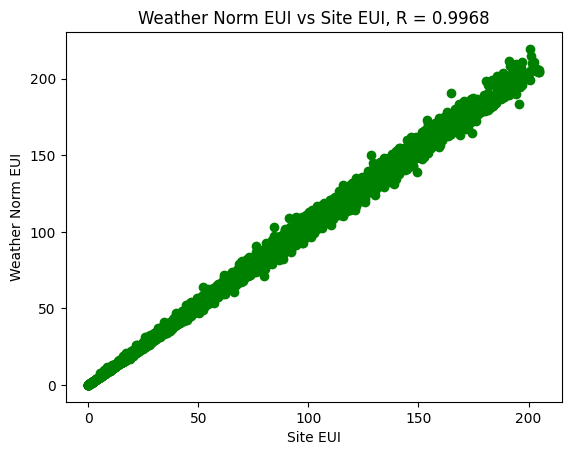

In [ ]:
plot_data = data_src[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'go')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(plot_data, rowvar=False)[0][1]);

Именно такие признаки, как на графике, являются коллинеарными, и лучше всего оставлять только один подобный признак, чтобы увеличивать эффективность алгоритма и помогать ему лучше обобщать данные, получая более интерпретируемые результаты на выходе.

#### Вопрос
А что вы можете сказать про значения корреляции признаков с целевой переменной?

#### Пояснение
Конечно же, очень важно уточнить, что все разговоры про коллинеарность идут в рамках коллинеарности двух признаков между собой. Именно это может навредить анализу данных. В случае же, когда речь идет о сильно скореллированном признаке *с целевой переменной* — это, напротив, очень даже помогает нашему алгоритму!

Кстати говоря, почему? :)

Но давайте теперь вернемся к разговору про коллинеарность признаков между собой и построим тепловую карту для всех наших 111 признаков в датасете, чтобы оценить масштаб проблемы и фронт дальнейших работ!

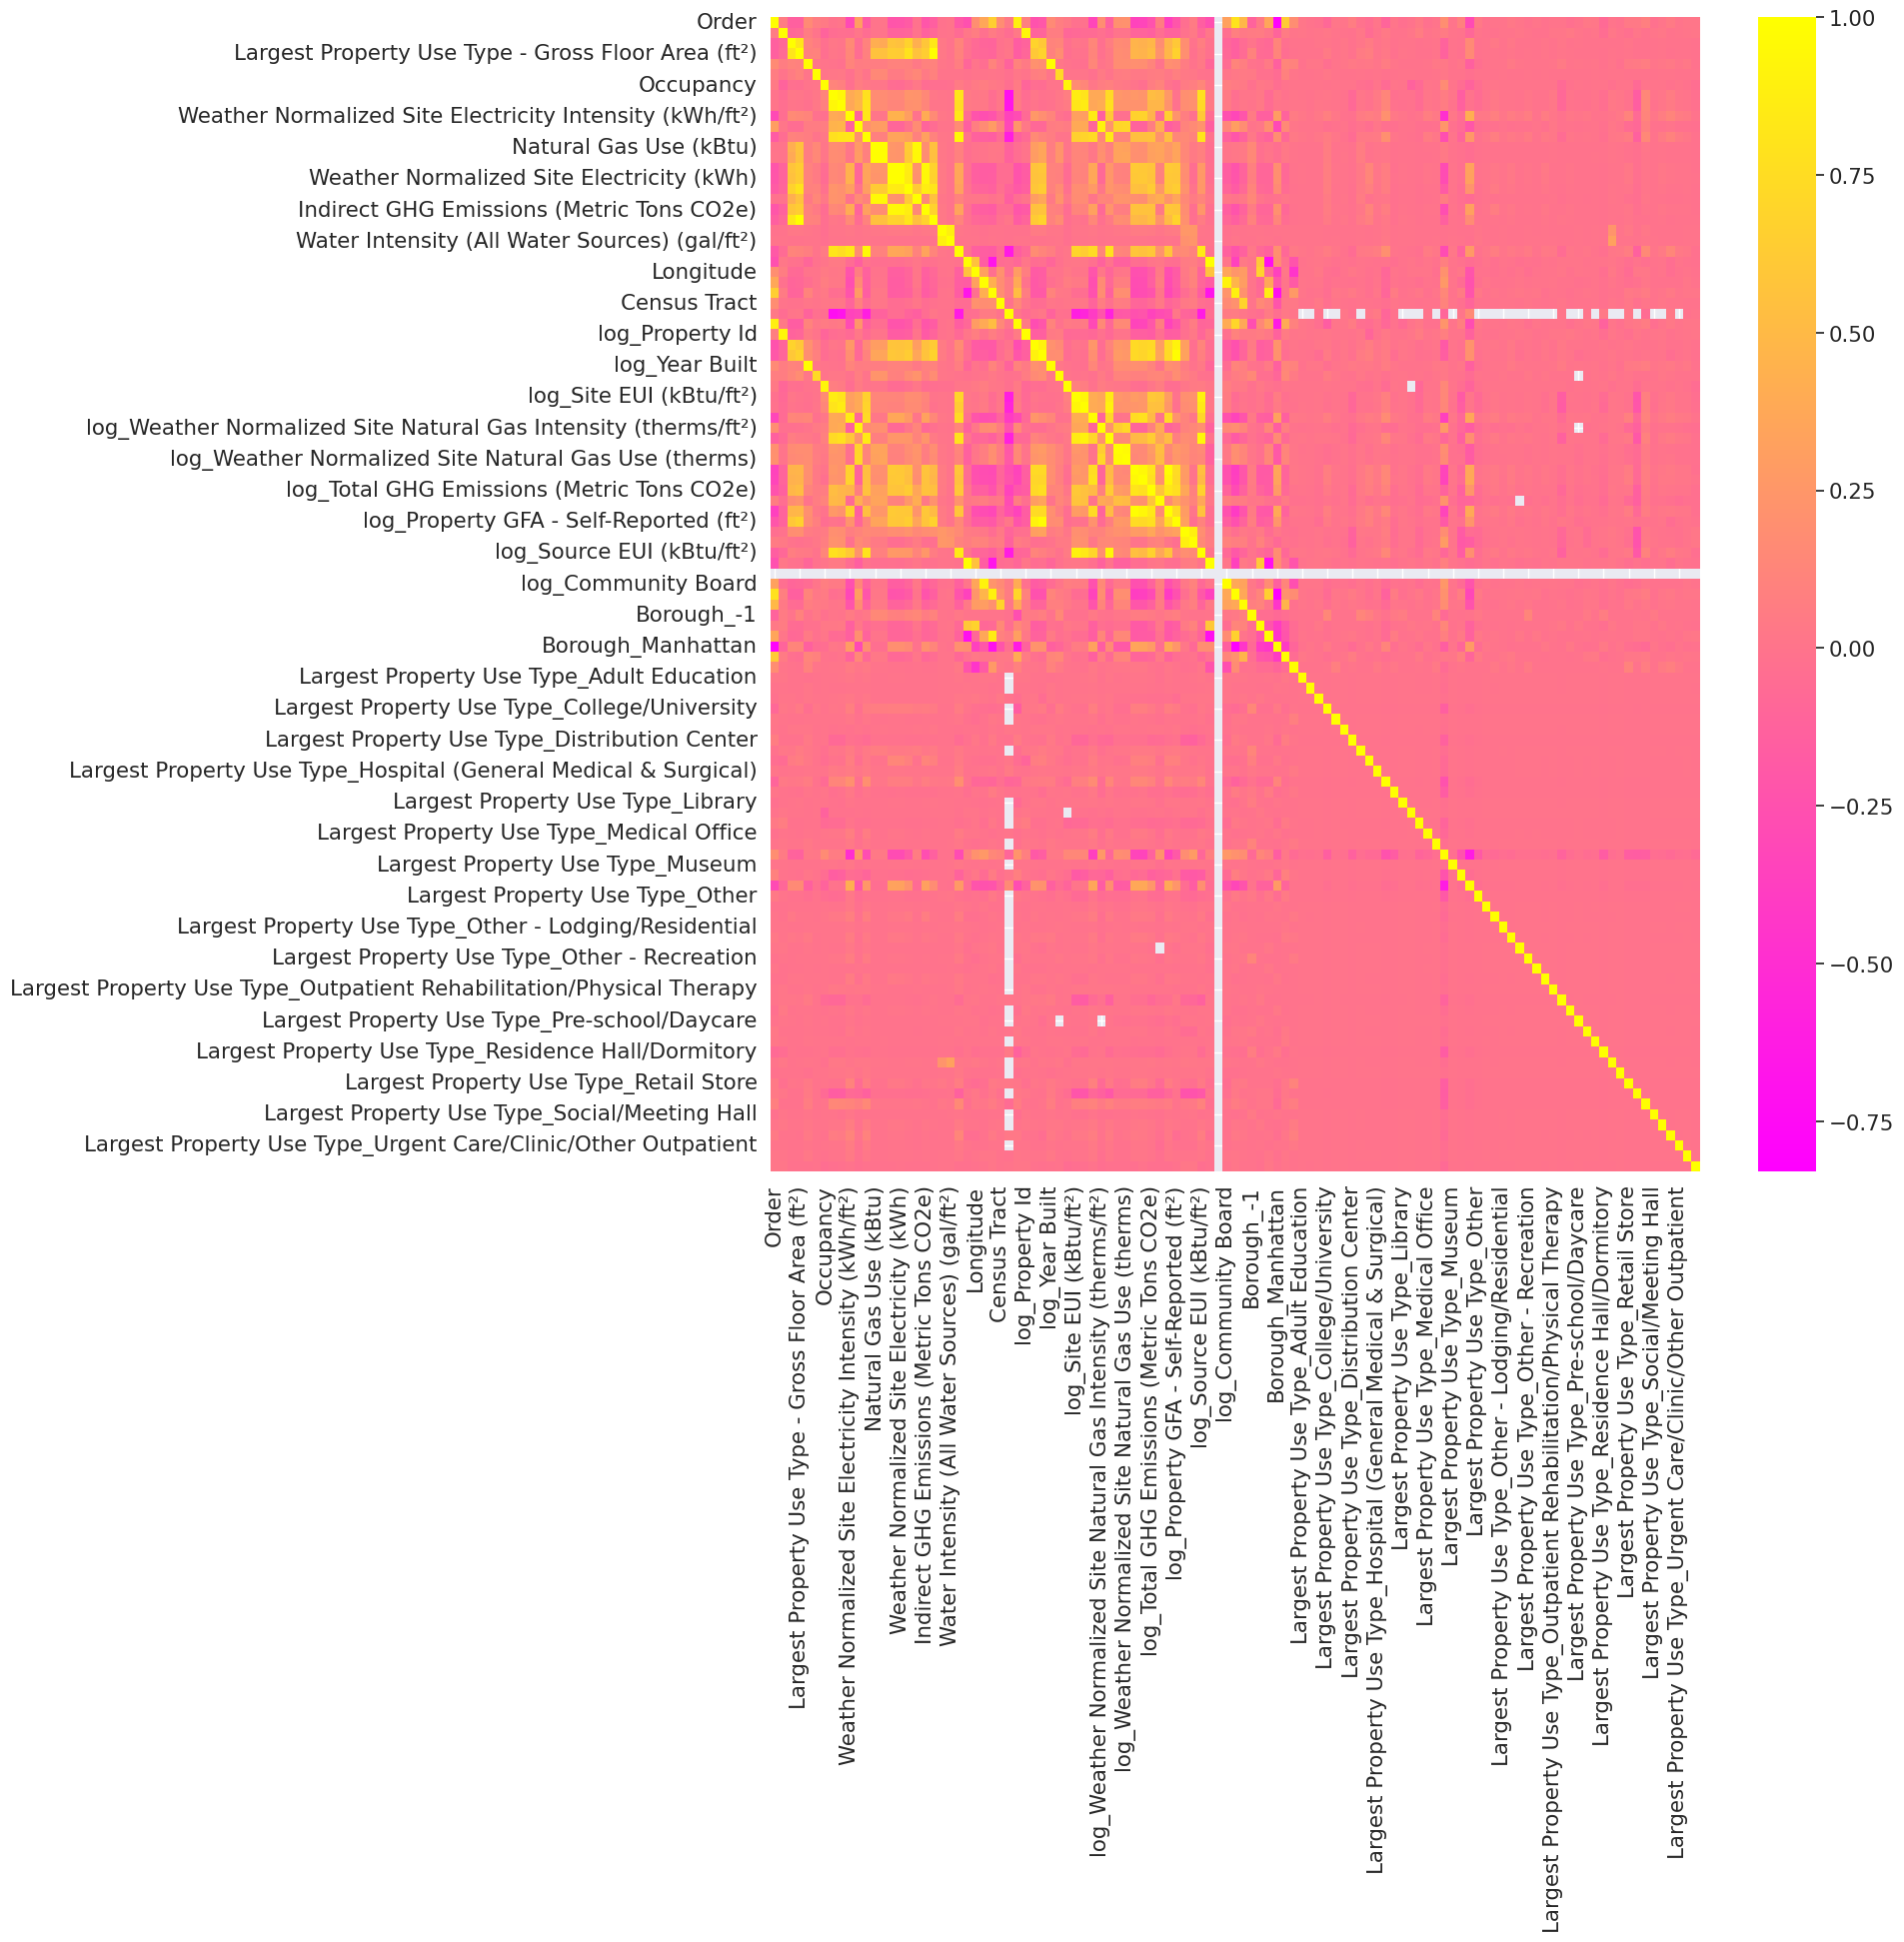

In [ ]:
# Отрисуем матрицу корреляции для наших признаков при помощи heatmap

sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
sns.heatmap(features.corr(), cbar=True, cmap='spring');

Мда.. Кажется, что, пожалуй, всё-таки слишком много признаков присутствует в нашем датасете на текущий момент (а я тут, кстати, напомню, что мы делали OHE только по 2 категориальным столбцам из имеющихся в исходном датасете, что, конечно, сразу как бы намекает на определенные недостатки и ограничения в применении данного алгоритма кодирования).

И тем не менее даже при таком количестве столбцов — невооруженным глазом видно, что есть столбцы с очень высокой корреляцией, а это значит, что мы можем попробовать от них избавиться!

С точки зрения программных способов детекции и определения подобных признаков — одним из широко используемых и распространенных способов является расчет коэффициента увеличения дисперсии.

В нашем случае я решил использовать так называемый thebcorrelation coefficient: один из двух признаков будет автоматически удален если коэффициент корреляции для этой пары выше 0.6.

Выбор именно такого порога для коэффициента корреляции может показаться необоснованным, но он был установлен опытным путем при решении именно этой конкретной задачи. Стоит помнить, что машинное обучение и анализ данных в целом — наука в значительной степени экспериментальная, и зачастую применение методов в ней может сводиться к произвольному поиску лучших параметров безо всякого обоснования.

In [ ]:
# Воспользуемся следующей функцией для того, чтобы избавиться от сильно скоррелированных признаков

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Удалит коллинеарные признаки в dataframe с коэффициентом корреляции, превышающим пороговое значение.
        Удаление коллинеарных функций может помочь алгоритму обобщить и улучшить интерпретируемость модели,
        а также позволяет избавиться от бесполезных с точки зрения информации признаков

    Inputs:
        x: исходная матрица признаков
        threshold: любые объекты с корреляциями выше этого значения удаляются

    Output:
        dataframe который содержит только слабо коллинеарные признаки
    '''

    # Не хотим удалять корреляцию между целевой перемнной и признаками
    y = x['score']
    x = x.drop(columns = ['score'])

    # Вычисляем матрицу корреляции
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Проходим по всей матрице и сравниваем корреляции
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), i:(i+1)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # Если корреляция превышает порог, то добавляем кандидата на удаление
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Удаляем один из двух скоррелированных признаков
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    # Удаляем колонки, которые содержат в себе только пропуски
    x = x.dropna(axis=1, how = 'all')

    x['score'] = y

    return x

Итак, воспользуемся написанной выше функцией, чтобы удалить сильно скоррелированные признаки


In [ ]:
features = remove_collinear_features(features, 0.6)
features.shape

(11319, 67)

Проверим, что корреляций по модулю больших 0.6 не осталось

In [ ]:
corrr = features.corr()
corrr.replace(1.0, 0.0, inplace = True)
corrr.max().max(), corrr.min().min()

(0.5585468714844275, -0.7238643844646085)

Почему же наш код не сработал и у нас осталась корреляция -0.72? В коде ошибка?

После всех проведенных нами махинаций отрисуем еще раз матрицу корреляции:


<Axes: >

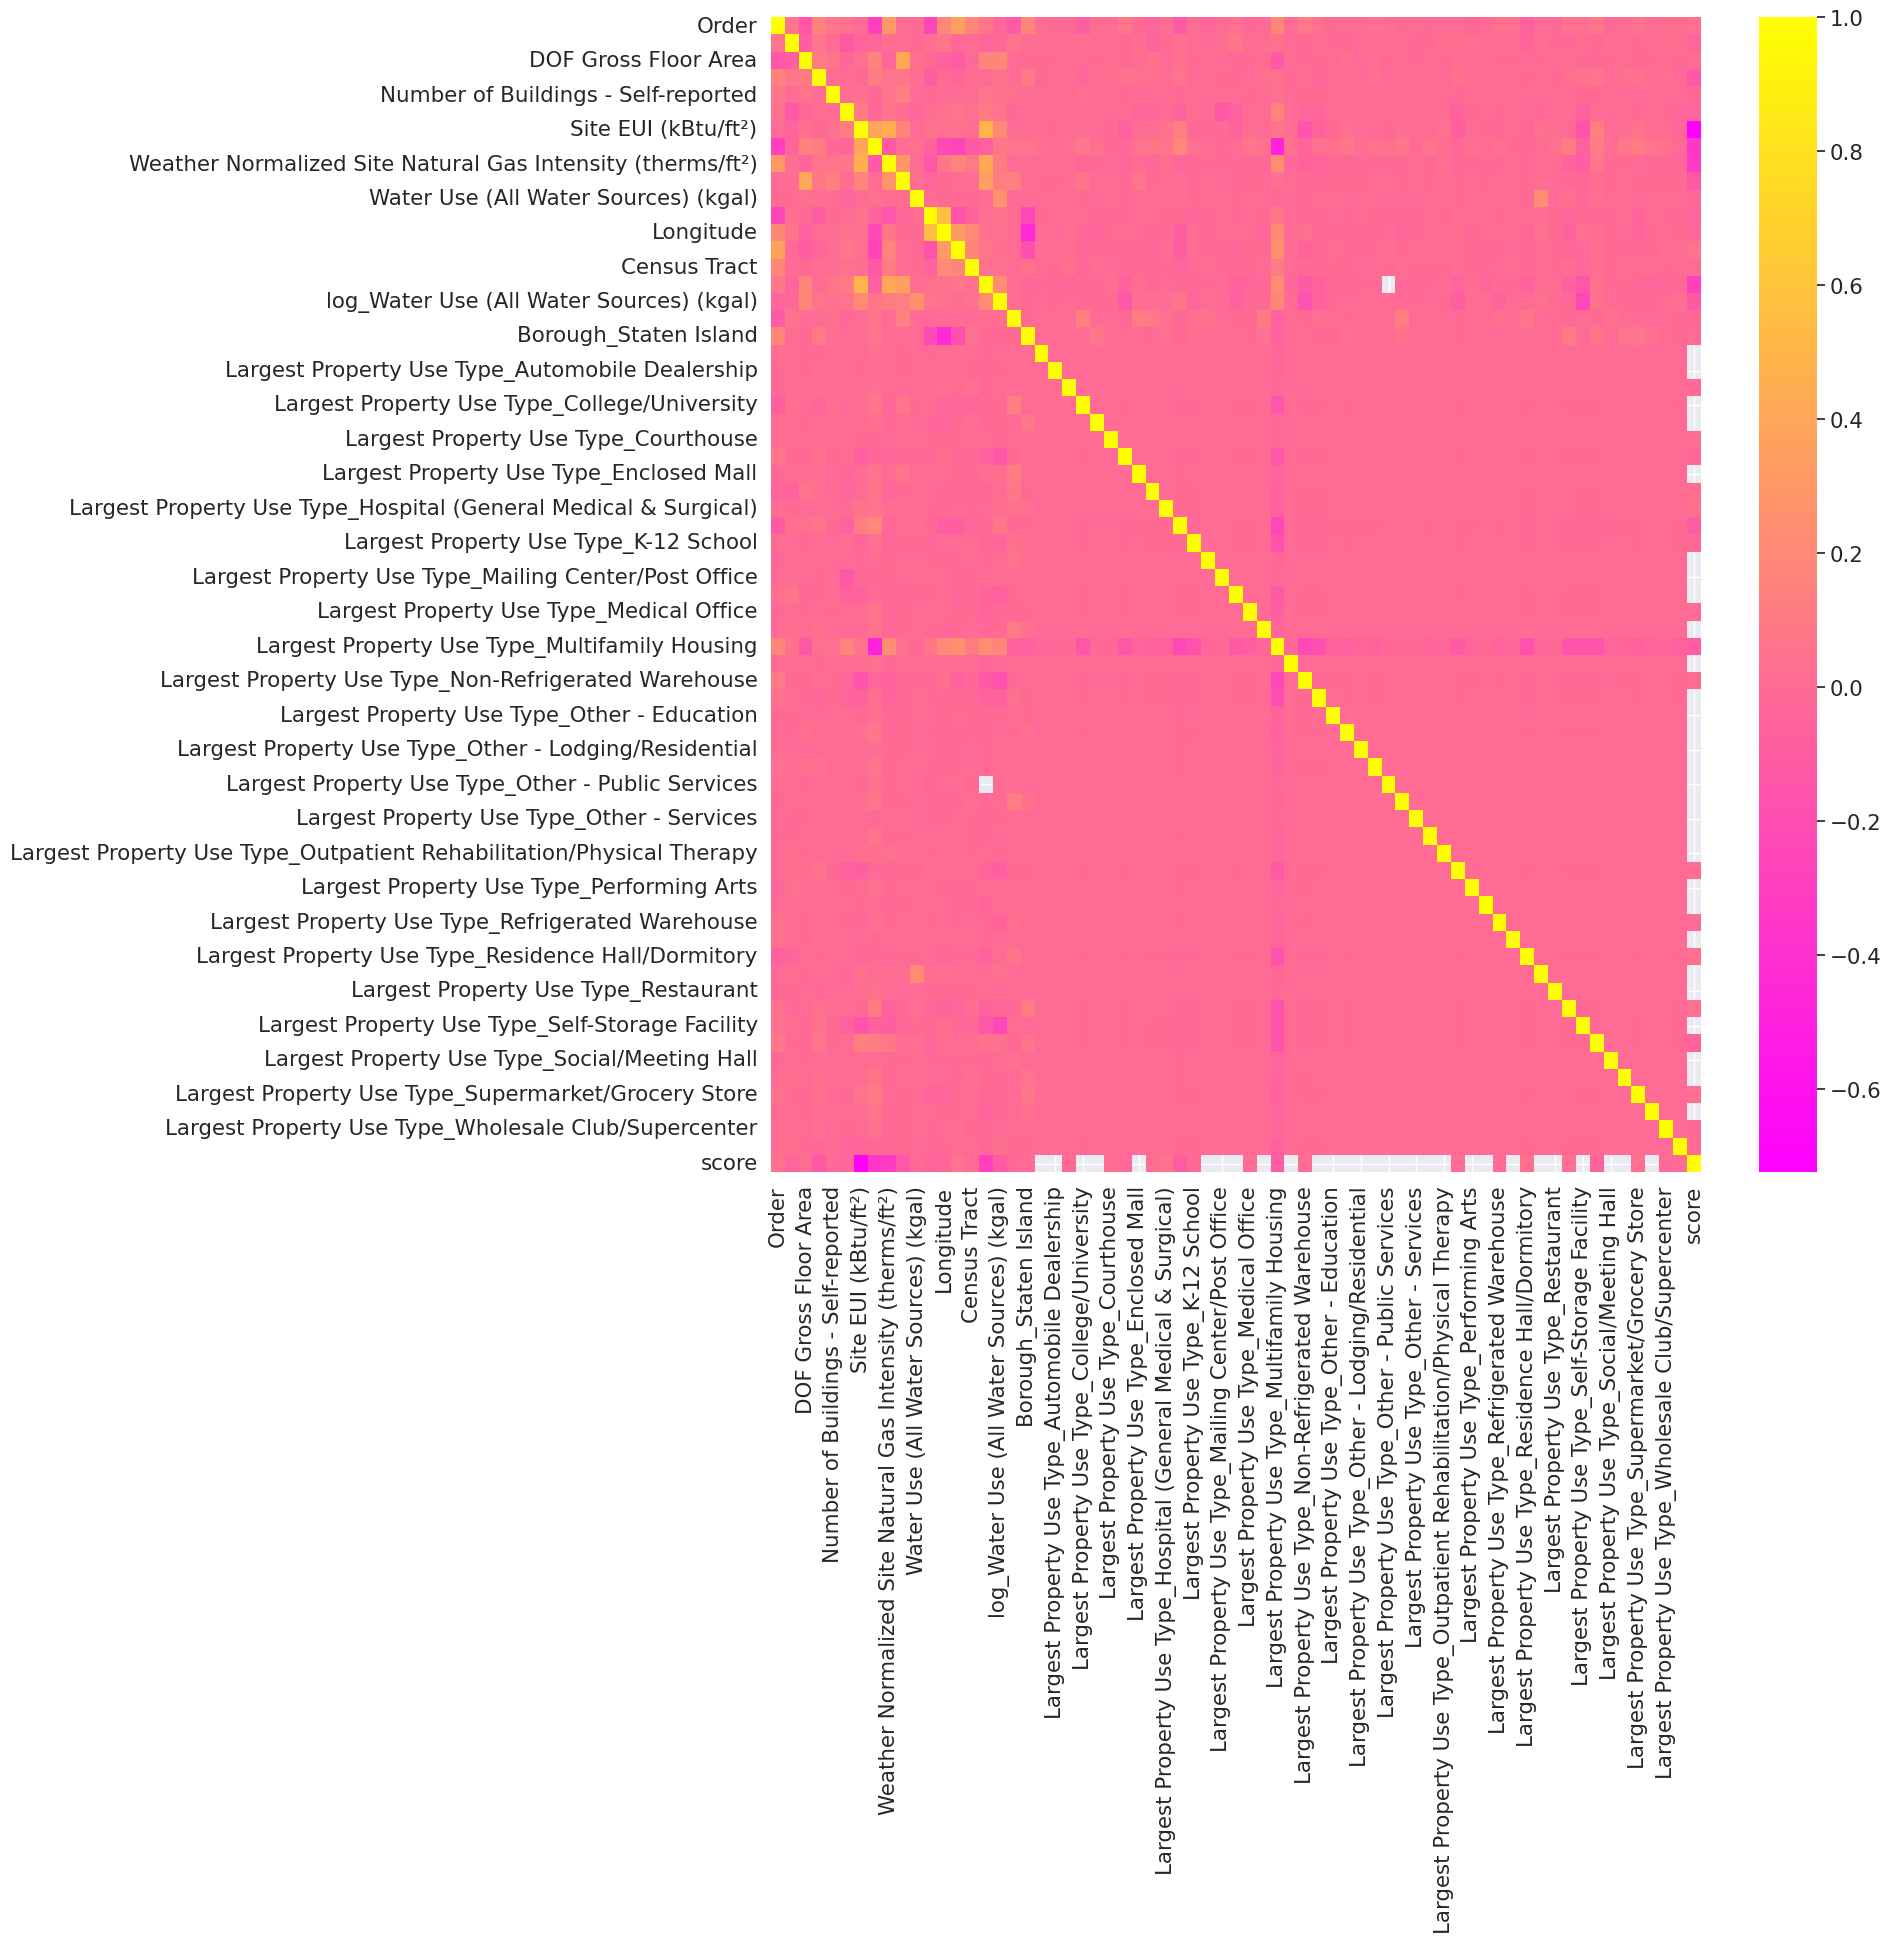

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))
sns.heatmap(features.corr(), cbar=True, cmap='spring')

Видно, что ситуация значительно улучшилась! У нас осталось только 67 несильно скоррелированных признаков (из 111 исходных), что уже совсем неплохой результат для первого раза!

### Дополнительный Feature Selection



В качестве послесловия к разделу про Feature Engineering, стоит упомянуть, что существует множество других видов [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html), помимо рассмотренных выше. Самые популярные: [principal components analysis (PCA)](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf), — который преобразует функции в уменьшенное количество измерений, сохраняющих наибольшую вариативность; или же [independent components analysis (ICA)](http://cs229.stanford.edu/notes/cs229-notes11.pdf), — который стремится найти "независимые источники" в наборе признаков.

Хотя упомянутые выше методы могут быть крайне эффективны для уменьшения количества признаков и увеличения качества алгоритма, они создают новые атрибуты, которые не имеют физического смысла, а, следовательно, делают интерпретацию модели практически невозможной. Тем не менее, данные методы очень полезны для работы с многомерными данными, и я советую к прочтению [ источник](https://machinelearningmastery.com/feature-selection-machine-learning-python/).

Ну, а в рамках нашего курса мы с вами обязательно еще к ним вернемся — во второй половине, в разделе ML! :)

## Раздел 2. Cohort analysis

Как мы помним из лекции, когорта — это группа пользователей, которых объединяют некоторые общие критерии.

Когортный анализ в продуктовой аналитике — это метод, который позволяет нам наблюдать за динамикой изменений выделенных нами когорт, продумывать различные стратегии и подходы работы с ними, а также извлекать глобальные бизнес-инсайты, на основе анализа имеющихся у нас данных об этих когортах.

Подробнее про когортный анализ вы можете почитать, например, вот [здесь](https://www.quora.com/What-is-a-cohort-analysis).

Сегодня мы попробуем с вами построить простейший пример когортного анализа на основе данных о заказах на печать документов для одного сервиса.



https://drive.google.com/file/d/1MvleEJkiEPaTJqmi3eLFyPUDltsW2nVp/view?usp=sharing

https://drive.google.com/file/d/1eoJ9eP_a4Dll9AYTCvYY9ezr5ldvqQo9/view?usp=sharing


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving printbox_joined_dates.csv to printbox_joined_dates.csv
Saving printbox_print_operation.csv to printbox_print_operation.csv


In [51]:
pd.set_option("display.precision", 2)

In [52]:
users_df = pd.read_csv('printbox_joined_dates.csv')
operations_df = pd.read_csv('printbox_print_operation.csv')

В рамках представленных датасетов у нас имеется лог всех операций, а также даты регистрации пользователей.

In [53]:
users_df = users_df.rename({'Time': 'reg_date'}, axis=1)
users_df.head()

reg_date  id
0  2017-11-28 00:19:40   2
1  2017-11-28 00:24:39   3
2  2017-11-28 00:30:21   4
3  2017-11-28 00:32:02   5
4  2017-11-28 00:36:22   6

`reg_date` — это дата регистрации пользователя, интересующее нас поле в рамках когортного анализа.

In [54]:
users_df = users_df.set_index('id')
users_df.head()

reg_date
id                     
2   2017-11-28 00:19:40
3   2017-11-28 00:24:39
4   2017-11-28 00:30:21
5   2017-11-28 00:32:02
6   2017-11-28 00:36:22

In [55]:
operations_df = operations_df.drop('time', axis=1)
operations_df.head()

id                   created_at                   updated_at  is_hidden  \
0   1  2017-11-27T21:38:54.495359Z  2017-11-27T21:39:33.371248Z          0   
1   2  2017-11-29T14:19:21.306698Z  2017-11-29T14:20:20.908574Z          0   
2   3  2017-11-29T20:29:10.736647Z  2017-11-29T20:29:53.236785Z          0   
3   4  2017-11-29T20:52:25.144211Z   2017-11-29T20:53:23.45643Z          0   
4   5  2017-11-30T09:42:39.093293Z  2017-11-30T09:43:27.492939Z          0   

   price  count_completed  count_total  status  cups_id  \
0    188                1            1     102    214.0   
1    190                1            1     102    215.0   
2    393                1            1     102    216.0   
3    438                1            1     102    217.0   
4    630                1            1     102    218.0   

   operation_document_id  operation_owner_id  operation_printer_id  \
0                      6                   6                     1   
1                      5                   1                     1   
2                     14                  15                     1   
3                     18                  15                     1   
4                     20                  15                     1   

   operation_printer_options_color_id  \
0                                   2   
1                                   2   
2                                   2   
3                                   2   
4                                   2   

   operation_printer_options_double_page_id  progress_counter  net_price  
0                                         1                -1          0  
1                                         1                -1          0  
2                                         1                -1          0  
3                                         1                -1          0  
4                                         4                -1          0

Дата создания операции — это `created_at`, ещё одно интересующее нас поле.

In [56]:
operations_df.shape

(140949, 16)

Обратите внимание — датасет уже достаточно внушительный по размеру (поэтому так долго грузился изначально)!

In [57]:
operations_df = operations_df.drop(['cups_id',], axis=1).dropna()
operations_df.head()

id                   created_at                   updated_at  is_hidden  \
0   1  2017-11-27T21:38:54.495359Z  2017-11-27T21:39:33.371248Z          0   
1   2  2017-11-29T14:19:21.306698Z  2017-11-29T14:20:20.908574Z          0   
2   3  2017-11-29T20:29:10.736647Z  2017-11-29T20:29:53.236785Z          0   
3   4  2017-11-29T20:52:25.144211Z   2017-11-29T20:53:23.45643Z          0   
4   5  2017-11-30T09:42:39.093293Z  2017-11-30T09:43:27.492939Z          0   

   price  count_completed  count_total  status  operation_document_id  \
0    188                1            1     102                      6   
1    190                1            1     102                      5   
2    393                1            1     102                     14   
3    438                1            1     102                     18   
4    630                1            1     102                     20   

   operation_owner_id  operation_printer_id  \
0                   6                     1   
1                   1                     1   
2                  15                     1   
3                  15                     1   
4                  15                     1   

   operation_printer_options_color_id  \
0                                   2   
1                                   2   
2                                   2   
3                                   2   
4                                   2   

   operation_printer_options_double_page_id  progress_counter  net_price  
0                                         1                -1          0  
1                                         1                -1          0  
2                                         1                -1          0  
3                                         1                -1          0  
4                                         4                -1          0

Поле `operation_owner_id` соответствует идентификатору пользователя, который производил операцию, то есть, получается, является внешним ключом для второй таблицы, относительно первой.

Кстати, а какая из этих двух таблиц в задаче главная, а какая — сопутствующая? Почему?

In [58]:
operations_df = operations_df.astype({'operation_owner_id': np.int32})
operations_df.head()

id                   created_at                   updated_at  is_hidden  \
0   1  2017-11-27T21:38:54.495359Z  2017-11-27T21:39:33.371248Z          0   
1   2  2017-11-29T14:19:21.306698Z  2017-11-29T14:20:20.908574Z          0   
2   3  2017-11-29T20:29:10.736647Z  2017-11-29T20:29:53.236785Z          0   
3   4  2017-11-29T20:52:25.144211Z   2017-11-29T20:53:23.45643Z          0   
4   5  2017-11-30T09:42:39.093293Z  2017-11-30T09:43:27.492939Z          0   

   price  count_completed  count_total  status  operation_document_id  \
0    188                1            1     102                      6   
1    190                1            1     102                      5   
2    393                1            1     102                     14   
3    438                1            1     102                     18   
4    630                1            1     102                     20   

   operation_owner_id  operation_printer_id  \
0                   6                     1   
1                   1                     1   
2                  15                     1   
3                  15                     1   
4                  15                     1   

   operation_printer_options_color_id  \
0                                   2   
1                                   2   
2                                   2   
3                                   2   
4                                   2   

   operation_printer_options_double_page_id  progress_counter  net_price  
0                                         1                -1          0  
1                                         1                -1          0  
2                                         1                -1          0  
3                                         1                -1          0  
4                                         4                -1          0

Соединим два датафрейма по `operation_owner_id`.

In [59]:
joined = pd.merge(operations_df.set_index('operation_owner_id'), users_df, left_index=True, right_index=True)
joined.head()

id                   created_at  \
operation_owner_id                                    
6                    1  2017-11-27T21:38:54.495359Z   
15                   3  2017-11-29T20:29:10.736647Z   
15                   4  2017-11-29T20:52:25.144211Z   
15                   5  2017-11-30T09:42:39.093293Z   
9                    9  2017-12-01T14:55:46.871895Z   

                                     updated_at  is_hidden  price  \
operation_owner_id                                                  
6                   2017-11-27T21:39:33.371248Z          0    188   
15                  2017-11-29T20:29:53.236785Z          0    393   
15                   2017-11-29T20:53:23.45643Z          0    438   
15                  2017-11-30T09:43:27.492939Z          0    630   
9                   2017-12-01T14:56:38.004241Z          0    202   

                    count_completed  count_total  status  \
operation_owner_id                                         
6                                 1            1     102   
15                                1            1     102   
15                                1            1     102   
15                                1            1     102   
9                                 1            1     102   

                    operation_document_id  operation_printer_id  \
operation_owner_id                                                
6                                       6                     1   
15                                     14                     1   
15                                     18                     1   
15                                     20                     1   
9                                      24                     1   

                    operation_printer_options_color_id  \
operation_owner_id                                       
6                                                    2   
15                                                   2   
15                                                   2   
15                                                   2   
9                                                    2   

                    operation_printer_options_double_page_id  \
operation_owner_id                                             
6                                                          1   
15                                                         1   
15                                                         1   
15                                                         4   
9                                                          1   

                    progress_counter  net_price             reg_date  
operation_owner_id                                                    
6                                 -1          0  2017-11-28 00:36:22  
15                                -1          0  2017-11-29 23:26:18  
15                                -1          0  2017-11-29 23:26:18  
15                                -1          0  2017-11-29 23:26:18  
9                                 -1          0  2017-11-28 14:16:14

Оставим только нужные нам колонки и установим корректные типы данных

In [61]:
df = joined[['created_at', 'reg_date', 'id']]
df = df.astype({'id': np.int32})
df['created_at'] = pd.to_datetime(df['created_at'])
df['reg_date'] = pd.to_datetime(df['reg_date'])
df

created_at            reg_date  \
operation_owner_id                                                        
6                  2017-11-27 21:38:54.495359+00:00 2017-11-28 00:36:22   
15                 2017-11-29 20:29:10.736647+00:00 2017-11-29 23:26:18   
15                 2017-11-29 20:52:25.144211+00:00 2017-11-29 23:26:18   
15                 2017-11-30 09:42:39.093293+00:00 2017-11-29 23:26:18   
9                  2017-12-01 14:55:46.871895+00:00 2017-11-28 14:16:14   
...                                             ...                 ...   
92                 2020-07-07 10:20:30.570182+00:00 2017-12-08 01:34:37   
92                 2020-07-07 10:20:57.594824+00:00 2017-12-08 01:34:37   
92                 2020-07-07 10:21:17.369061+00:00 2017-12-08 01:34:37   
92                 2020-07-07 10:22:11.384704+00:00 2017-12-08 01:34:37   
3134               2020-07-07 10:24:49.613306+00:00 2018-10-01 09:29:09   

                        id  
operation_owner_id          
6                        1  
15                       3  
15                       4  
15                       5  
9                        9  
...                    ...  
92                  142864  
92                  142865  
92                  142866  
92                  142867  
3134                142868  

[137689 rows x 3 columns]

Получается уже достаточно приятно!

### Задание для самостоятельного решения (выделение когорты)

На основе столбца `df['reg_date']` выделите когорту (когортную группу), используя год и месяц регистрации. Когорту запишите в формате "YYYY-MM". Можно ориентироваться на пример вывода ниже.

In [ ]:
# your code here

created_at      id CohortGroup
operation_owner_id                                                     
6                  2017-11-27 21:38:54.495359+00:00       1     2017-11
15                 2017-11-29 20:29:10.736647+00:00       3     2017-11
15                 2017-11-29 20:52:25.144211+00:00       4     2017-11
15                 2017-11-30 09:42:39.093293+00:00       5     2017-11
9                  2017-12-01 14:55:46.871895+00:00       9     2017-11
...                                             ...     ...         ...
92                 2020-07-07 10:20:30.570182+00:00  142864     2017-12
92                 2020-07-07 10:20:57.594824+00:00  142865     2017-12
92                 2020-07-07 10:21:17.369061+00:00  142866     2017-12
92                 2020-07-07 10:22:11.384704+00:00  142867     2017-12
3134               2020-07-07 10:24:49.613306+00:00  142868     2018-10

[137689 rows x 3 columns]

Ниже представлено решение:

Выделим из даты регистрации год и месяц:

In [62]:
df['reg_date'].dt.strftime('%Y-%m')  # такой способ наиболее предпочтителен, хотя возможны и другие

operation_owner_id
6       2017-11
15      2017-11
15      2017-11
15      2017-11
9       2017-11
         ...   
92      2017-12
92      2017-12
92      2017-12
92      2017-12
3134    2018-10
Name: reg_date, Length: 137689, dtype: object

Так мы будем идентифицировать когорты

In [63]:
df['CohortGroup'] = df['reg_date'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('reg_date', axis=1)
df

created_at      id CohortGroup
operation_owner_id                                                     
6                  2017-11-27 21:38:54.495359+00:00       1     2017-11
15                 2017-11-29 20:29:10.736647+00:00       3     2017-11
15                 2017-11-29 20:52:25.144211+00:00       4     2017-11
15                 2017-11-30 09:42:39.093293+00:00       5     2017-11
9                  2017-12-01 14:55:46.871895+00:00       9     2017-11
...                                             ...     ...         ...
92                 2020-07-07 10:20:30.570182+00:00  142864     2017-12
92                 2020-07-07 10:20:57.594824+00:00  142865     2017-12
92                 2020-07-07 10:21:17.369061+00:00  142866     2017-12
92                 2020-07-07 10:22:11.384704+00:00  142867     2017-12
3134               2020-07-07 10:24:49.613306+00:00  142868     2018-10

[137689 rows x 3 columns]

Таким же образом, как и с когортами, будем идентифицировать периоды в которые происходят заказы. Определим колонку `OrderPeriod`:

In [64]:
df['OrderPeriod'] = df['created_at'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('created_at', axis=1)
df

id CohortGroup OrderPeriod
operation_owner_id                                
6                        1     2017-11     2017-11
15                       3     2017-11     2017-11
15                       4     2017-11     2017-11
15                       5     2017-11     2017-11
9                        9     2017-11     2017-12
...                    ...         ...         ...
92                  142864     2017-12     2020-07
92                  142865     2017-12     2020-07
92                  142866     2017-12     2020-07
92                  142867     2017-12     2020-07
3134                142868     2018-10     2020-07

[137689 rows x 3 columns]

### Задание для самостоятельного решения (работа с когортами)

Теперь для каждой когорты и для каждого периода посчитайте кол-во сделанных заказов. На выходе должна получиться таблица, аналогичная выводу ниже

In [ ]:
# your code here

orders
CohortGroup OrderPeriod        
2017-11     2017-11           4
            2017-12          13
            2018-01          21
            2018-02          31
            2018-03          25
...                         ...
2020-05     2020-06         161
            2020-07          16
2020-06     2020-06         460
            2020-07          33
2020-07     2020-07          69

[560 rows x 1 columns]

Ниже представлено решение:

In [65]:
df = df.groupby(['CohortGroup', 'OrderPeriod']).count().rename({'id': 'orders'}, axis=1)
df

orders
CohortGroup OrderPeriod        
2017-11     2017-11           4
            2017-12          13
            2018-01          21
            2018-02          31
            2018-03          25
...                         ...
2020-05     2020-06         161
            2020-07          16
2020-06     2020-06         460
            2020-07          33
2020-07     2020-07          69

[560 rows x 1 columns]

Оставим идентификацию периодов как "первый" месяц, "второй" месяц, "третий" месяц, ...

In [67]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = df.groupby(level=0, group_keys=False).apply(cohort_period)
cohorts

orders  CohortPeriod
CohortGroup OrderPeriod                      
2017-11     2017-11           4             1
            2017-12          13             2
            2018-01          21             3
            2018-02          31             4
            2018-03          25             5
...                         ...           ...
2020-05     2020-06         161             2
            2020-07          16             3
2020-06     2020-06         460             1
            2020-07          33             2
2020-07     2020-07          69             1

[560 rows x 2 columns]

In [68]:
results = cohorts.reset_index().set_index(['CohortGroup', 'CohortPeriod']).drop('OrderPeriod', axis=1)
results

orders
CohortGroup CohortPeriod        
2017-11     1                  4
            2                 13
            3                 21
            4                 31
            5                 25
...                          ...
2020-05     2                161
            3                 16
2020-06     1                460
            2                 33
2020-07     1                 69

[560 rows x 1 columns]

Теперь осталось сделать трюк с помощью нашего любимого `.unstack()`

In [69]:
results = results.unstack(level=1)
results

orders                                                         \
CohortPeriod      1       2       3       4      5       6       7       8    
CohortGroup                                                                   
2017-11          4.0    13.0    21.0    31.0   25.0    45.0    40.0    59.0   
2017-12       1346.0  1036.0   734.0  1007.0  918.0  1207.0   839.0   146.0   
2018-01        643.0   304.0   334.0   251.0  376.0   253.0    36.0    16.0   
2018-02        292.0   275.0   155.0   296.0  167.0     4.0     2.0   100.0   
2018-03        240.0   150.0   211.0    78.0    8.0     2.0   164.0   146.0   
2018-04        336.0   440.0   187.0    29.0    4.0   239.0   266.0   374.0   
2018-05        727.0   353.0    58.0    25.0  164.0   248.0   161.0   262.0   
2018-06        309.0    35.0     7.0    76.0  115.0   110.0   116.0    66.0   
2018-07        110.0     3.0    43.0    38.0   31.0    30.0     2.0    11.0   
2018-08         41.0    45.0    64.0    42.0   50.0     5.0    34.0    35.0   
2018-09       1008.0  1228.0  1228.0  1289.0  438.0   977.0  1273.0  1239.0   
2018-10          1.0   787.0   627.0   748.0  206.0   379.0   583.0   664.0   
2018-11          2.0   482.0   482.0   127.0  173.0   335.0   343.0   369.0   
2018-12        949.0   199.0   252.0   364.0  413.0   607.0   408.0    93.0   
2019-01        388.0   126.0   158.0   175.0  158.0   165.0   112.0    54.0   
2019-02        485.0   381.0   311.0   335.0  320.0   128.0    73.0   147.0   
2019-03       1039.0   666.0   584.0   497.0  113.0    61.0   289.0   373.0   
2019-04          5.0   946.0   553.0   322.0   58.0    22.0   194.0   205.0   
2019-05       1399.0   542.0   108.0    48.0  250.0   234.0   201.0   442.0   
2019-06       1072.0   180.0    58.0   180.0  183.0   174.0   308.0   198.0   
2019-07        356.0   132.0    71.0    51.0   62.0    90.0    60.0    46.0   
2019-08        350.0   320.0   270.0   222.0  237.0   104.0   223.0   124.0   
2019-09       2297.0  2046.0  1471.0  1732.0  660.0  1380.0   898.0   112.0   
2019-10       1683.0   929.0  1240.0   562.0  801.0   526.0    70.0    97.0   
2019-11       1542.0  1201.0   435.0   338.0  255.0    55.0    55.0    38.0   
2019-12       3563.0   862.0   663.0   493.0   47.0    67.0   149.0    62.0   
2020-01       1148.0   269.0   172.0    27.0   50.0    45.0     5.0     NaN   
2020-02       1053.0   391.0    28.0    36.0   51.0    37.0     NaN     NaN   
2020-03        548.0    46.0    59.0    72.0   33.0     NaN     NaN     NaN   
2020-04        507.0   302.0   205.0    42.0    NaN     NaN     NaN     NaN   
2020-05        291.0   161.0    16.0     NaN    NaN     NaN     NaN     NaN   
2020-06        460.0    33.0     NaN     NaN    NaN     NaN     NaN     NaN   
2020-07         69.0     NaN     NaN     NaN    NaN     NaN     NaN     NaN   

                                                                           \
CohortPeriod      9      10     11     12      13      14      15      16   
CohortGroup                                                                 
2017-11         29.0   25.0   19.0   23.0    23.0    24.0    14.0    25.0   
2017-12         87.0  751.0  704.0  828.0   950.0   405.0   501.0   610.0   
2018-01        192.0  214.0  229.0  293.0   165.0   112.0   169.0   131.0   
2018-02        165.0  196.0  176.0   83.0    76.0   104.0   132.0   173.0   
2018-03        142.0  153.0   52.0  103.0   115.0   141.0   133.0    97.0   
2018-04        402.0  111.0  174.0  259.0   233.0   289.0   192.0    34.0   
2018-05        110.0  102.0  231.0  142.0   253.0   289.0    93.0    74.0   
2018-06        103.0  151.0  164.0  166.0   130.0    41.0    40.0   112.0   
2018-07         22.0   16.0   21.0   11.0    37.0     9.0    14.0    42.0   
2018-08         25.0   25.0    6.0   29.0     7.0    42.0    21.0    14.0   
2018-09       1173.0  686.0  129.0  103.0  1045.0  1153.0  1007.0  1209.0   
2018-10        680.0  412.0   42.0   57.0   462.0   499.0   465.0   646.0   
2018-11       

Понятнее ли теперь, с учетом нового отображения, почему в Cohort Period мы решили сделать число, а не дату, как было до этого? Почему? Что вообще такое Cohort Period в данном случае?

#### Вопрос

Почему в таблице так много NaN'ов?

Давайте теперь построим тепловую карту, на основе нашей таблицы!

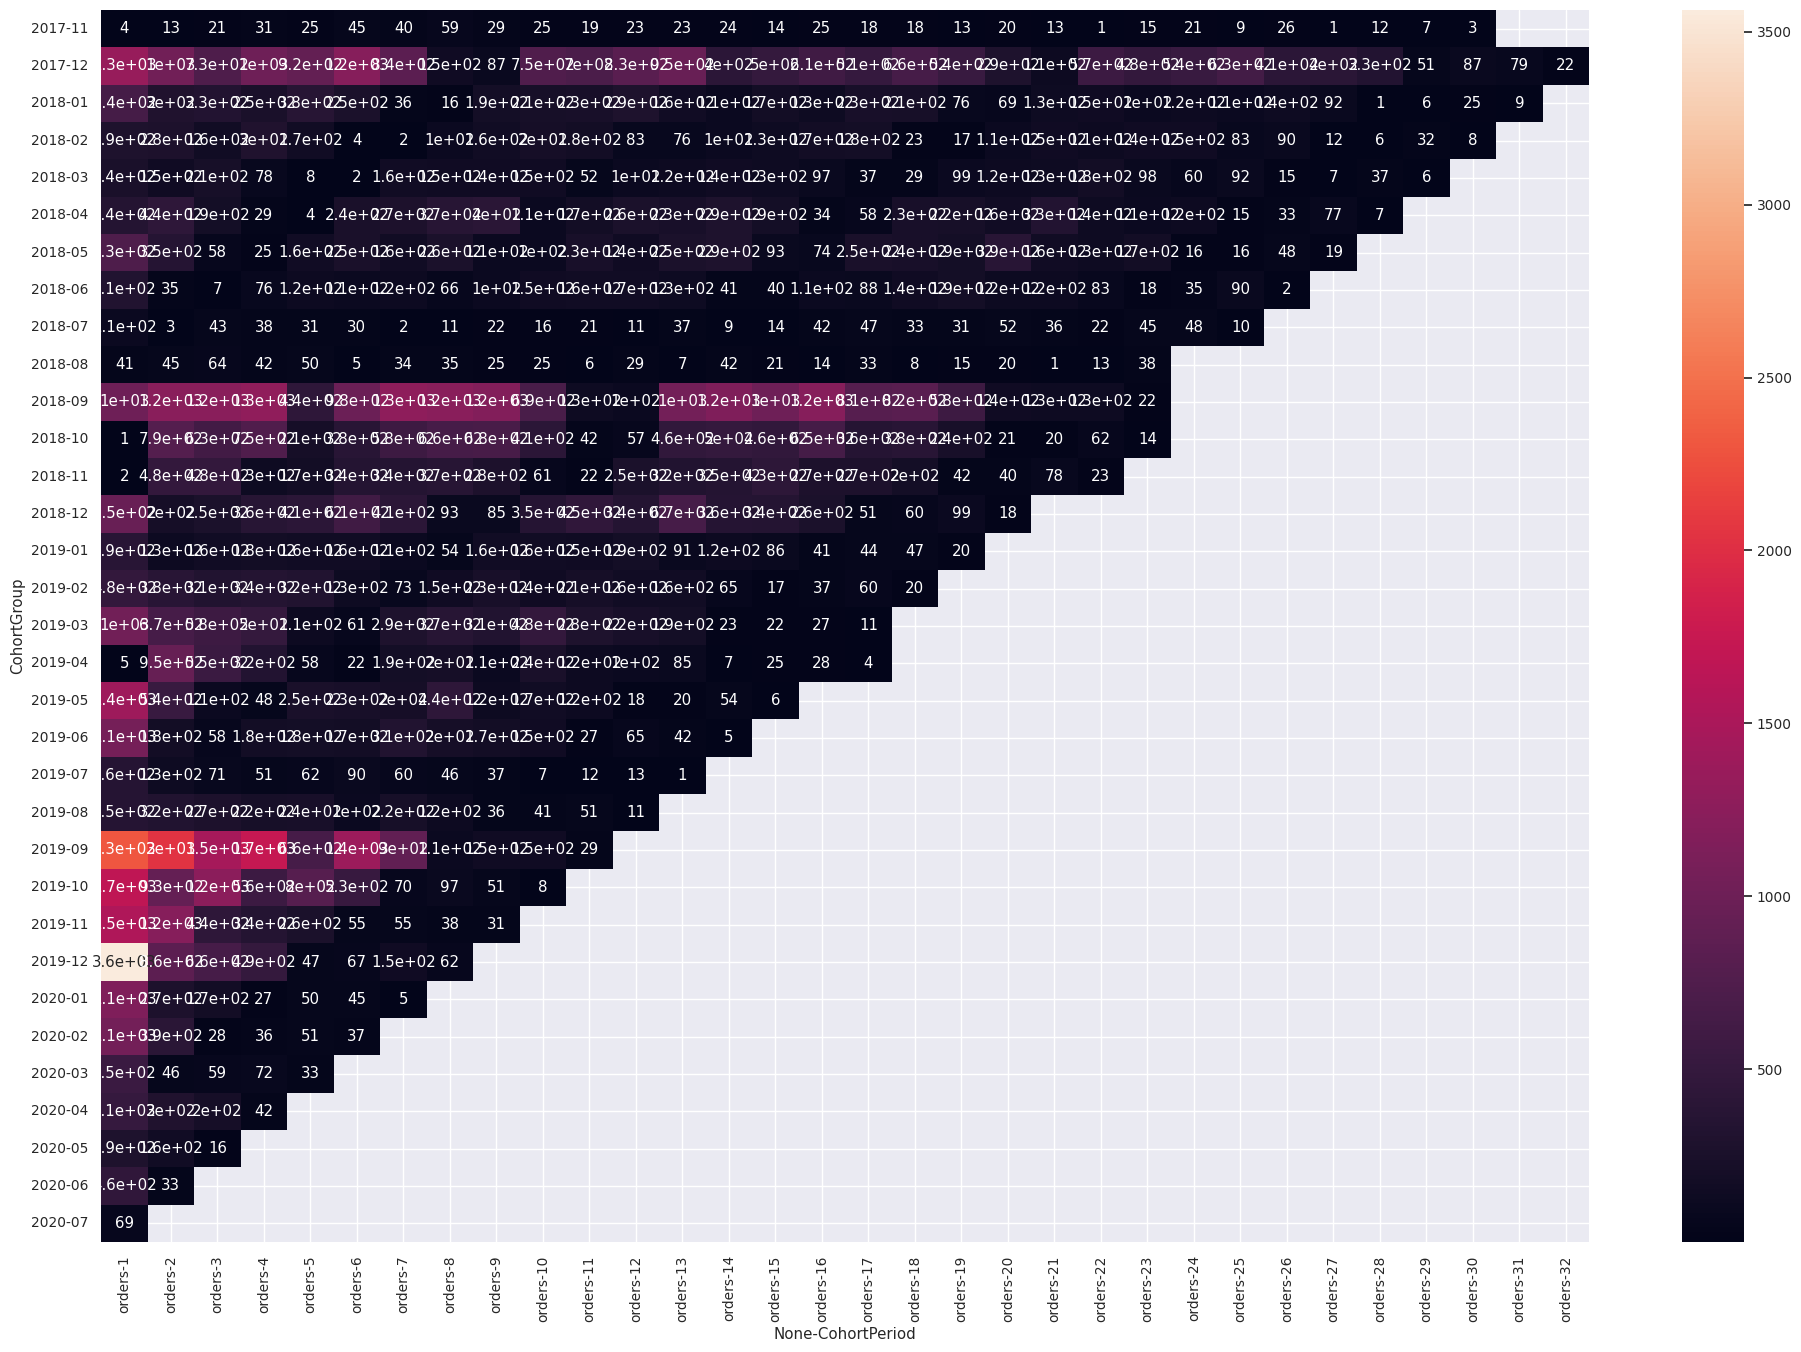

In [70]:
plt.figure(figsize=(24, 16))
sns.set(font_scale=0.9)
sns.heatmap(results, mask=results.isnull(), annot=True);

Не самое приятное... А что если без аннотаций?

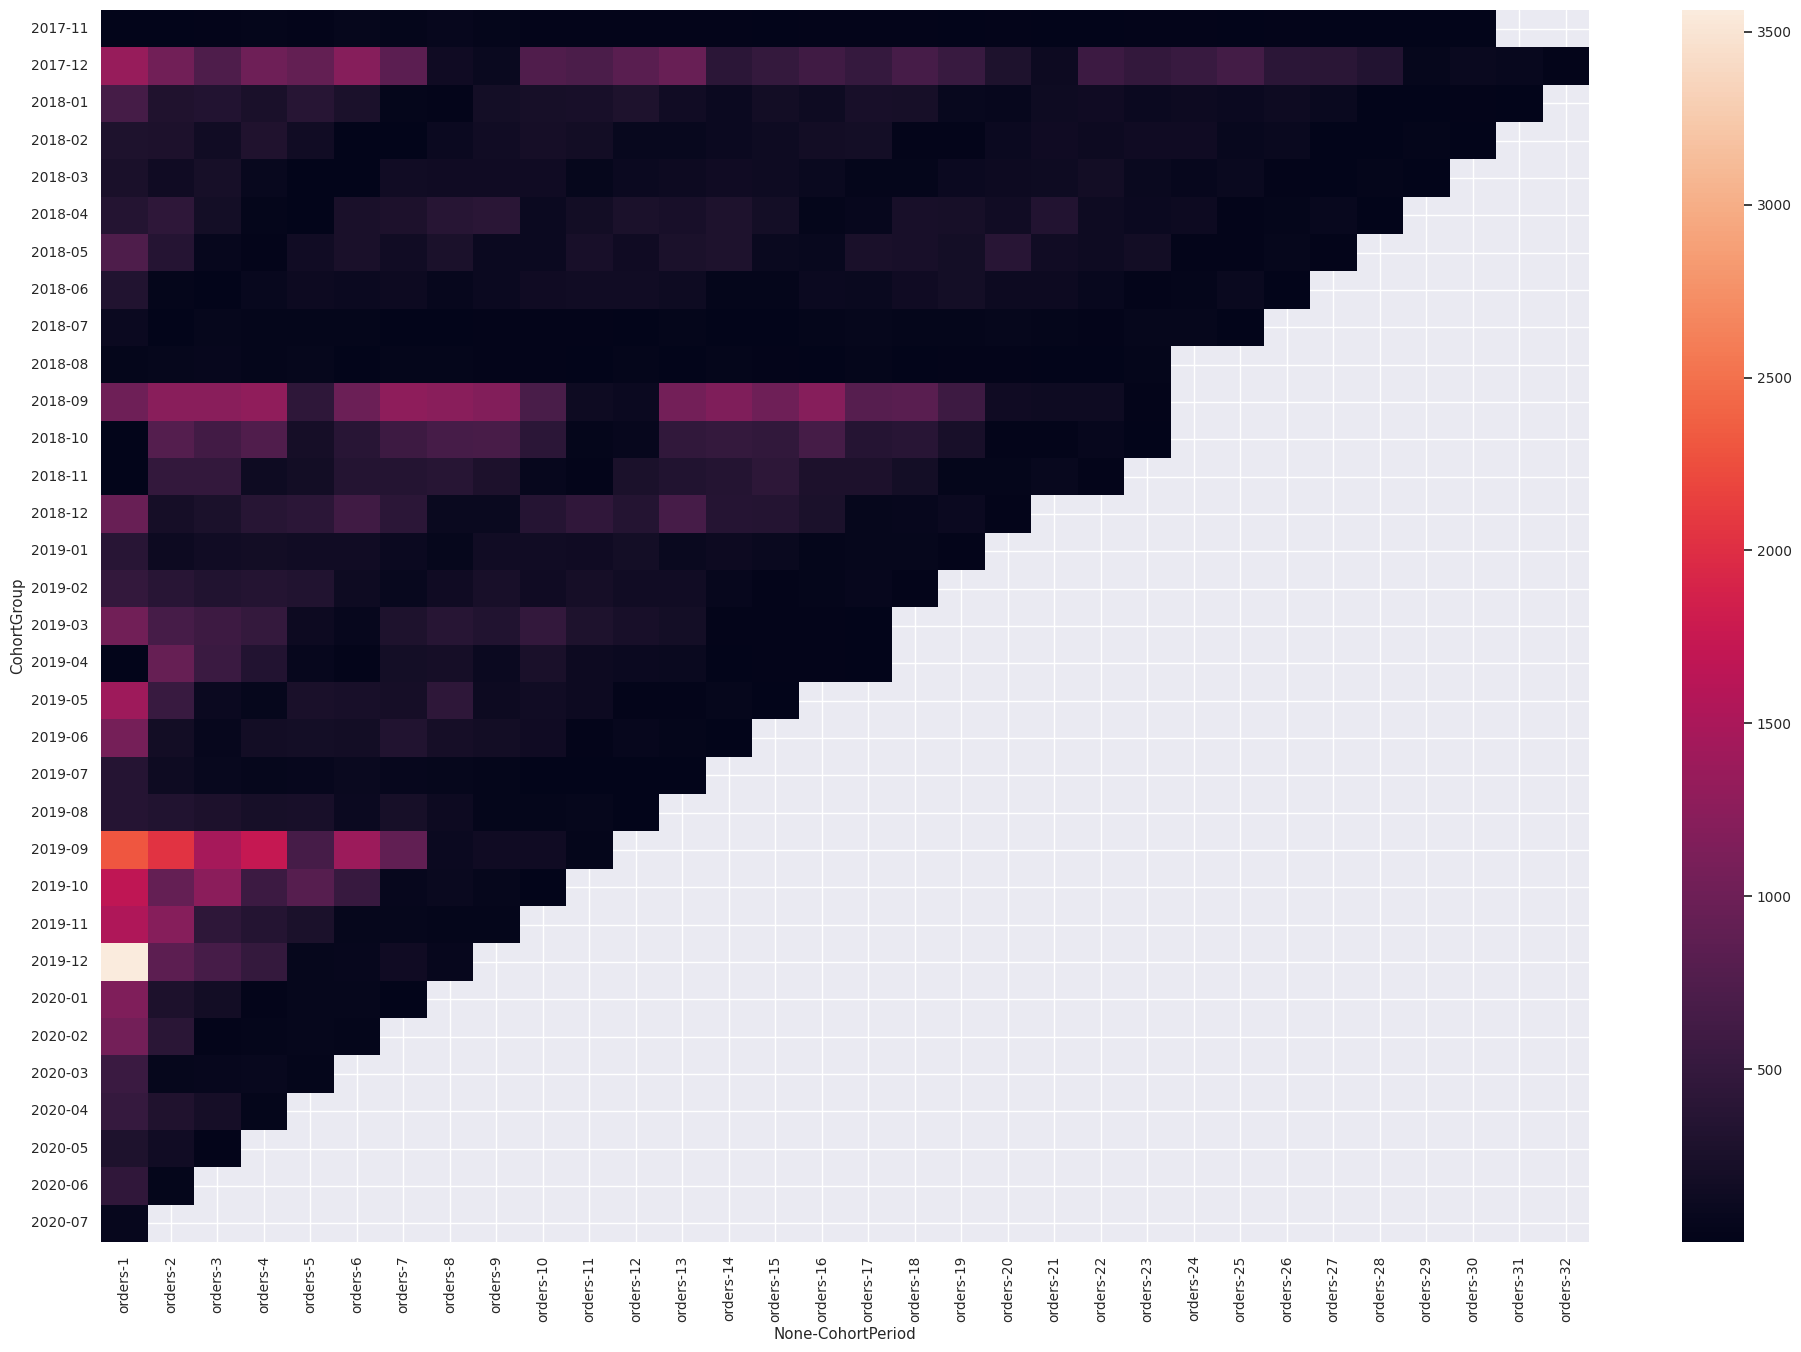

In [71]:
plt.figure(figsize=(24, 16))
sns.heatmap(results, mask=results.isnull(), annot=False);

Уже лучше, но обратим внимание, что цвета указываются относительно абсолютных значений за весь период. Сделаем нормировку по строчкам, чтобы увидеть периодическую динамику по кол-ву заказов.

### Задание для самостоятельного решения (тепловая карта когорт)

Необходимо получить относительную тепловую карту когорт, сделав нормировку по максимальному значению в строке, чтобы увидеть динамику заказов. Ориентируйтесь на пример ниже.

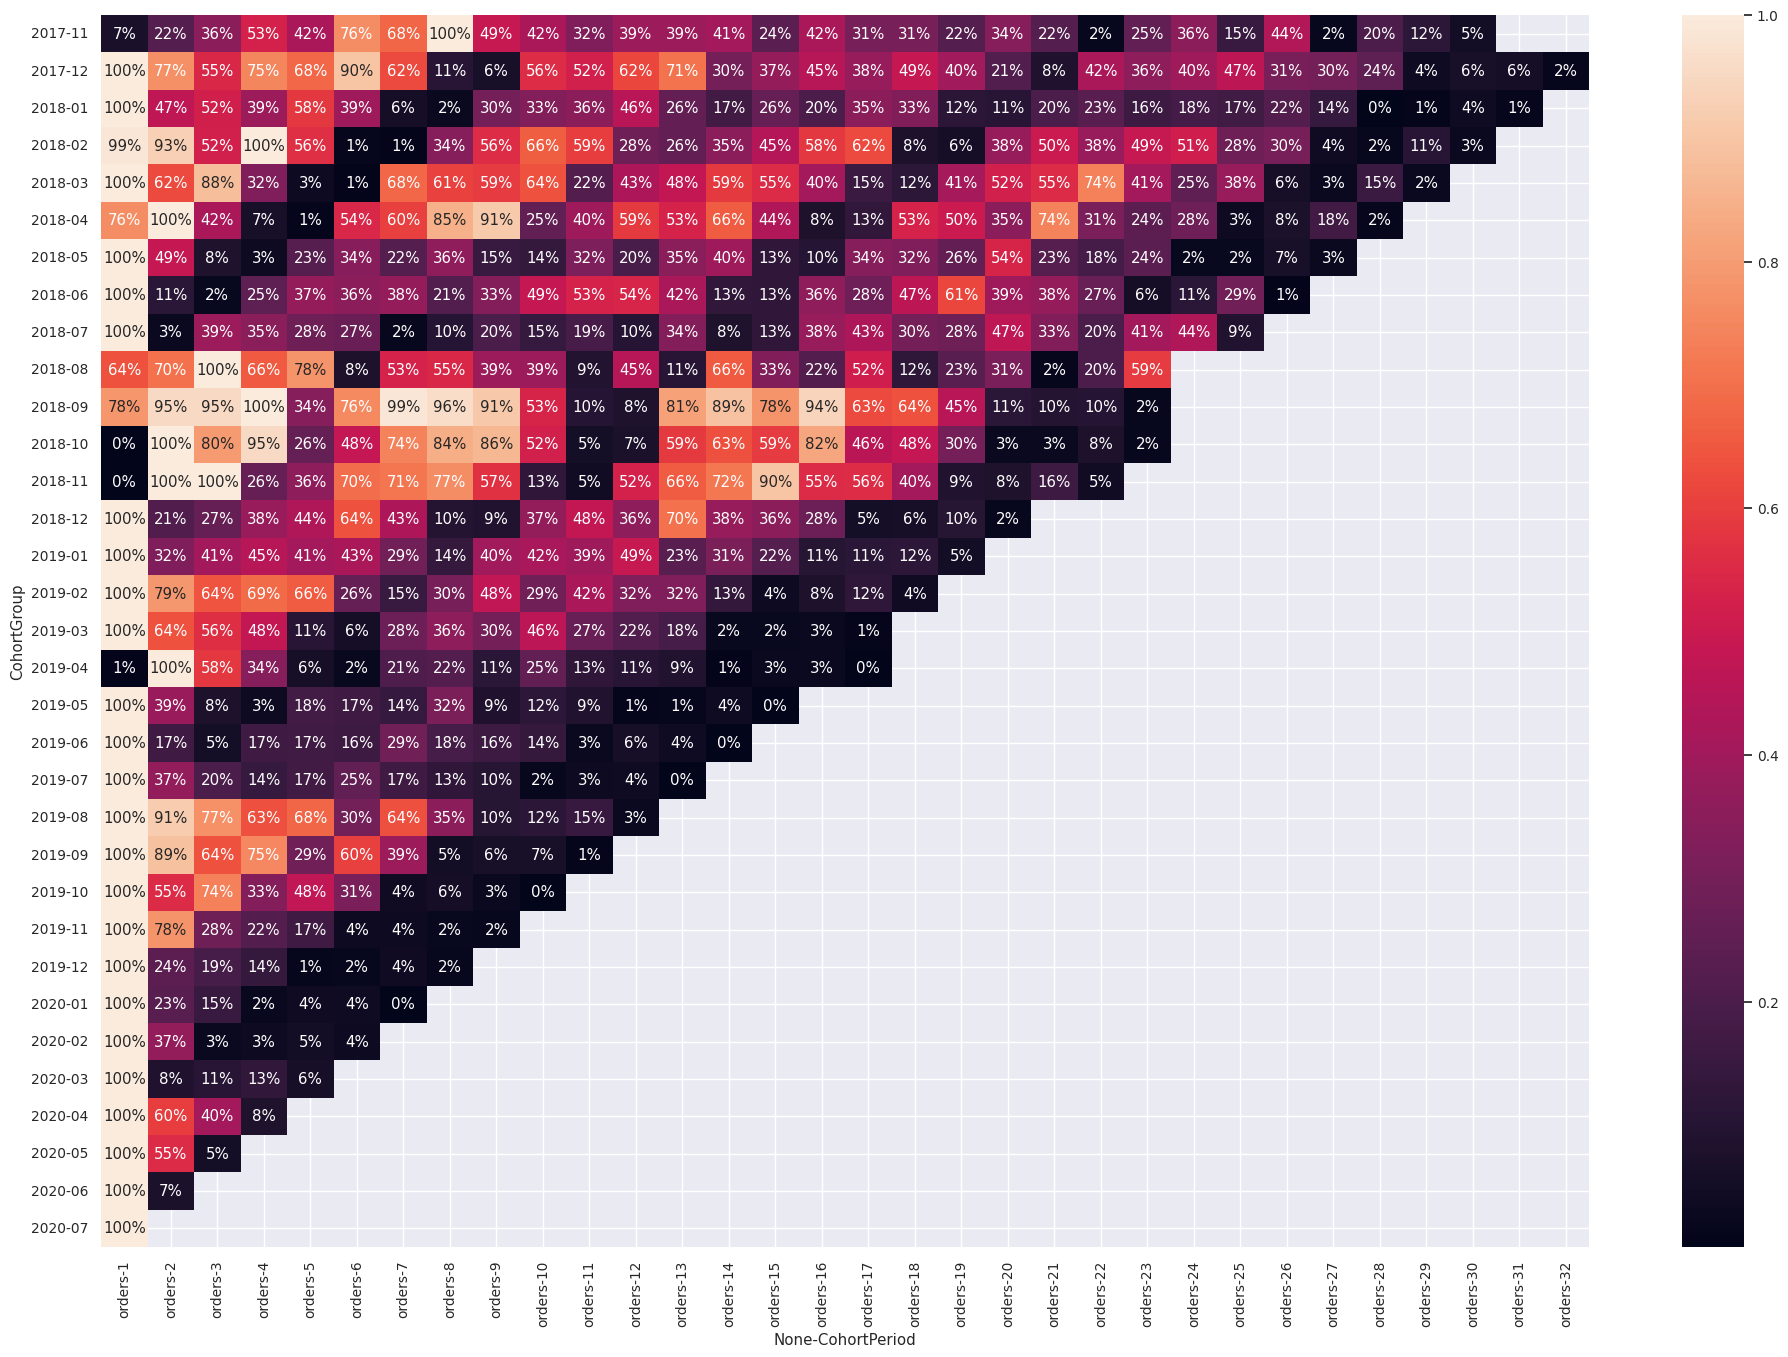

In [ ]:
# your code here

Ниже представлено решение:

In [72]:
results.T.max()

CohortGroup
2017-11      59.0
2017-12    1346.0
2018-01     643.0
2018-02     296.0
2018-03     240.0
2018-04     440.0
2018-05     727.0
2018-06     309.0
2018-07     110.0
2018-08      64.0
2018-09    1289.0
2018-10     787.0
2018-11     482.0
2018-12     949.0
2019-01     388.0
2019-02     485.0
2019-03    1039.0
2019-04     946.0
2019-05    1399.0
2019-06    1072.0
2019-07     356.0
2019-08     350.0
2019-09    2297.0
2019-10    1683.0
2019-11    1542.0
2019-12    3563.0
2020-01    1148.0
2020-02    1053.0
2020-03     548.0
2020-04     507.0
2020-05     291.0
2020-06     460.0
2020-07      69.0
dtype: float64

In [73]:
results_relative = results.divide(results.T.max(), axis=0)
results_relative

orders                                                        \
CohortPeriod        1     2     3     4         5         6         7     8    
CohortGroup                                                                    
2017-11       6.78e-02  0.22  0.36  0.53  4.24e-01  7.63e-01  6.78e-01  1.00   
2017-12       1.00e+00  0.77  0.55  0.75  6.82e-01  8.97e-01  6.23e-01  0.11   
2018-01       1.00e+00  0.47  0.52  0.39  5.85e-01  3.93e-01  5.60e-02  0.02   
2018-02       9.86e-01  0.93  0.52  1.00  5.64e-01  1.35e-02  6.76e-03  0.34   
2018-03       1.00e+00  0.62  0.88  0.33  3.33e-02  8.33e-03  6.83e-01  0.61   
2018-04       7.64e-01  1.00  0.42  0.07  9.09e-03  5.43e-01  6.05e-01  0.85   
2018-05       1.00e+00  0.49  0.08  0.03  2.26e-01  3.41e-01  2.21e-01  0.36   
2018-06       1.00e+00  0.11  0.02  0.25  3.72e-01  3.56e-01  3.75e-01  0.21   
2018-07       1.00e+00  0.03  0.39  0.35  2.82e-01  2.73e-01  1.82e-02  0.10   
2018-08       6.41e-01  0.70  1.00  0.66  7.81e-01  7.81e-02  5.31e-01  0.55   
2018-09       7.82e-01  0.95  0.95  1.00  3.40e-01  7.58e-01  9.88e-01  0.96   
2018-10       1.27e-03  1.00  0.80  0.95  2.62e-01  4.82e-01  7.41e-01  0.84   
2018-11       4.15e-03  1.00  1.00  0.26  3.59e-01  6.95e-01  7.12e-01  0.77   
2018-12       1.00e+00  0.21  0.27  0.38  4.35e-01  6.40e-01  4.30e-01  0.10   
2019-01       1.00e+00  0.32  0.41  0.45  4.07e-01  4.25e-01  2.89e-01  0.14   
2019-02       1.00e+00  0.79  0.64  0.69  6.60e-01  2.64e-01  1.51e-01  0.30   
2019-03       1.00e+00  0.64  0.56  0.48  1.09e-01  5.87e-02  2.78e-01  0.36   
2019-04       5.29e-03  1.00  0.58  0.34  6.13e-02  2.33e-02  2.05e-01  0.22   
2019-05       1.00e+00  0.39  0.08  0.03  1.79e-01  1.67e-01  1.44e-01  0.32   
2019-06       1.00e+00  0.17  0.05  0.17  1.71e-01  1.62e-01  2.87e-01  0.18   
2019-07       1.00e+00  0.37  0.20  0.14  1.74e-01  2.53e-01  1.69e-01  0.13   
2019-08       1.00e+00  0.91  0.77  0.63  6.77e-01  2.97e-01  6.37e-01  0.35   
2019-09       1.00e+00  0.89  0.64  0.75  2.87e-01  6.01e-01  3.91e-01  0.05   
2019-10       1.00e+00  0.55  0.74  0.33  4.76e-01  3.13e-01  4.16e-02  0.06   
2019-11       1.00e+00  0.78  0.28  0.22  1.65e-01  3.57e-02  3.57e-02  0.02   
2019-12       1.00e+00  0.24  0.19  0.14  1.32e-02  1.88e-02  4.18e-02  0.02   
2020-01       1.00e+00  0.23  0.15  0.02  4.36e-02  3.92e-02  4.36e-03   NaN   
2020-02       1.00e+00  0.37  0.03  0.03  4.84e-02  3.51e-02       NaN   NaN   
2020-03       1.00e+00  0.08  0.11  0.13  6.02e-02       NaN       NaN   NaN   
2020-04       1.00e+00  0.60  0.40  0.08       NaN       NaN       NaN   NaN   
2020-05       1.00e+00  0.55  0.05   NaN       NaN       NaN       NaN   NaN   
2020-06       1.00e+00  0.07   NaN   NaN       NaN       NaN       NaN   NaN   
2020-07       1.00e+00   NaN   NaN   NaN       NaN       NaN       NaN   NaN   

                                                                              \
CohortPeriod    9         10    11    12        13        14        15    16   
CohortGroup                                                                    
2017-11       0.49  4.24e-01  0.32  0.39  3.90e-01  4.07e-01  2.37e-01  0.42   
2017-12       0.06  5.58e-01  0.52  0.62  7.06e-01  3.01e-01  3.72e-01  0.45   
2018-01       0.30  3.33e-01  0.36  0.46  2.57e-01  1.74e-01  2.63e-01  0.20   
2018-02       0.56  6.62e-01  0.59  0.28  2.57e-01  3.51e-01  4.46e-01  0.58   
2018-03       0.59  6.37e-01  0.22  0.43  4.79e-01  5.88e-01  5.54e-01  0.40   
2018-04       0.91  2.52e-01  0.40  0.59  5.30e-01  6.57e-01  4.36e-01  0.08   
2018-05       0.15  1.40e-01  0.32  0.20  3.48e-01  3.98e-01  1.28e-01  0.10   
2018-06       0.33  4.89e-01  0.53  0.54  4.21e-01  1.33e-01  1.29e-01  0.36   
2018-07       0.20  1.45e-01  0.19  0.10  3.36e-01  8.18e-02  1.27e-01  0.38   
2018-08       0.39  3.91e-01  0.09  0.45  1.09e-01  6.56e-01  3.28e-01  0.22   
2018-09       0.91  5.32e-01  0.10  0.08  8.11e-01  8.94e-01  7.81e-01  0.94   
2018-10       0

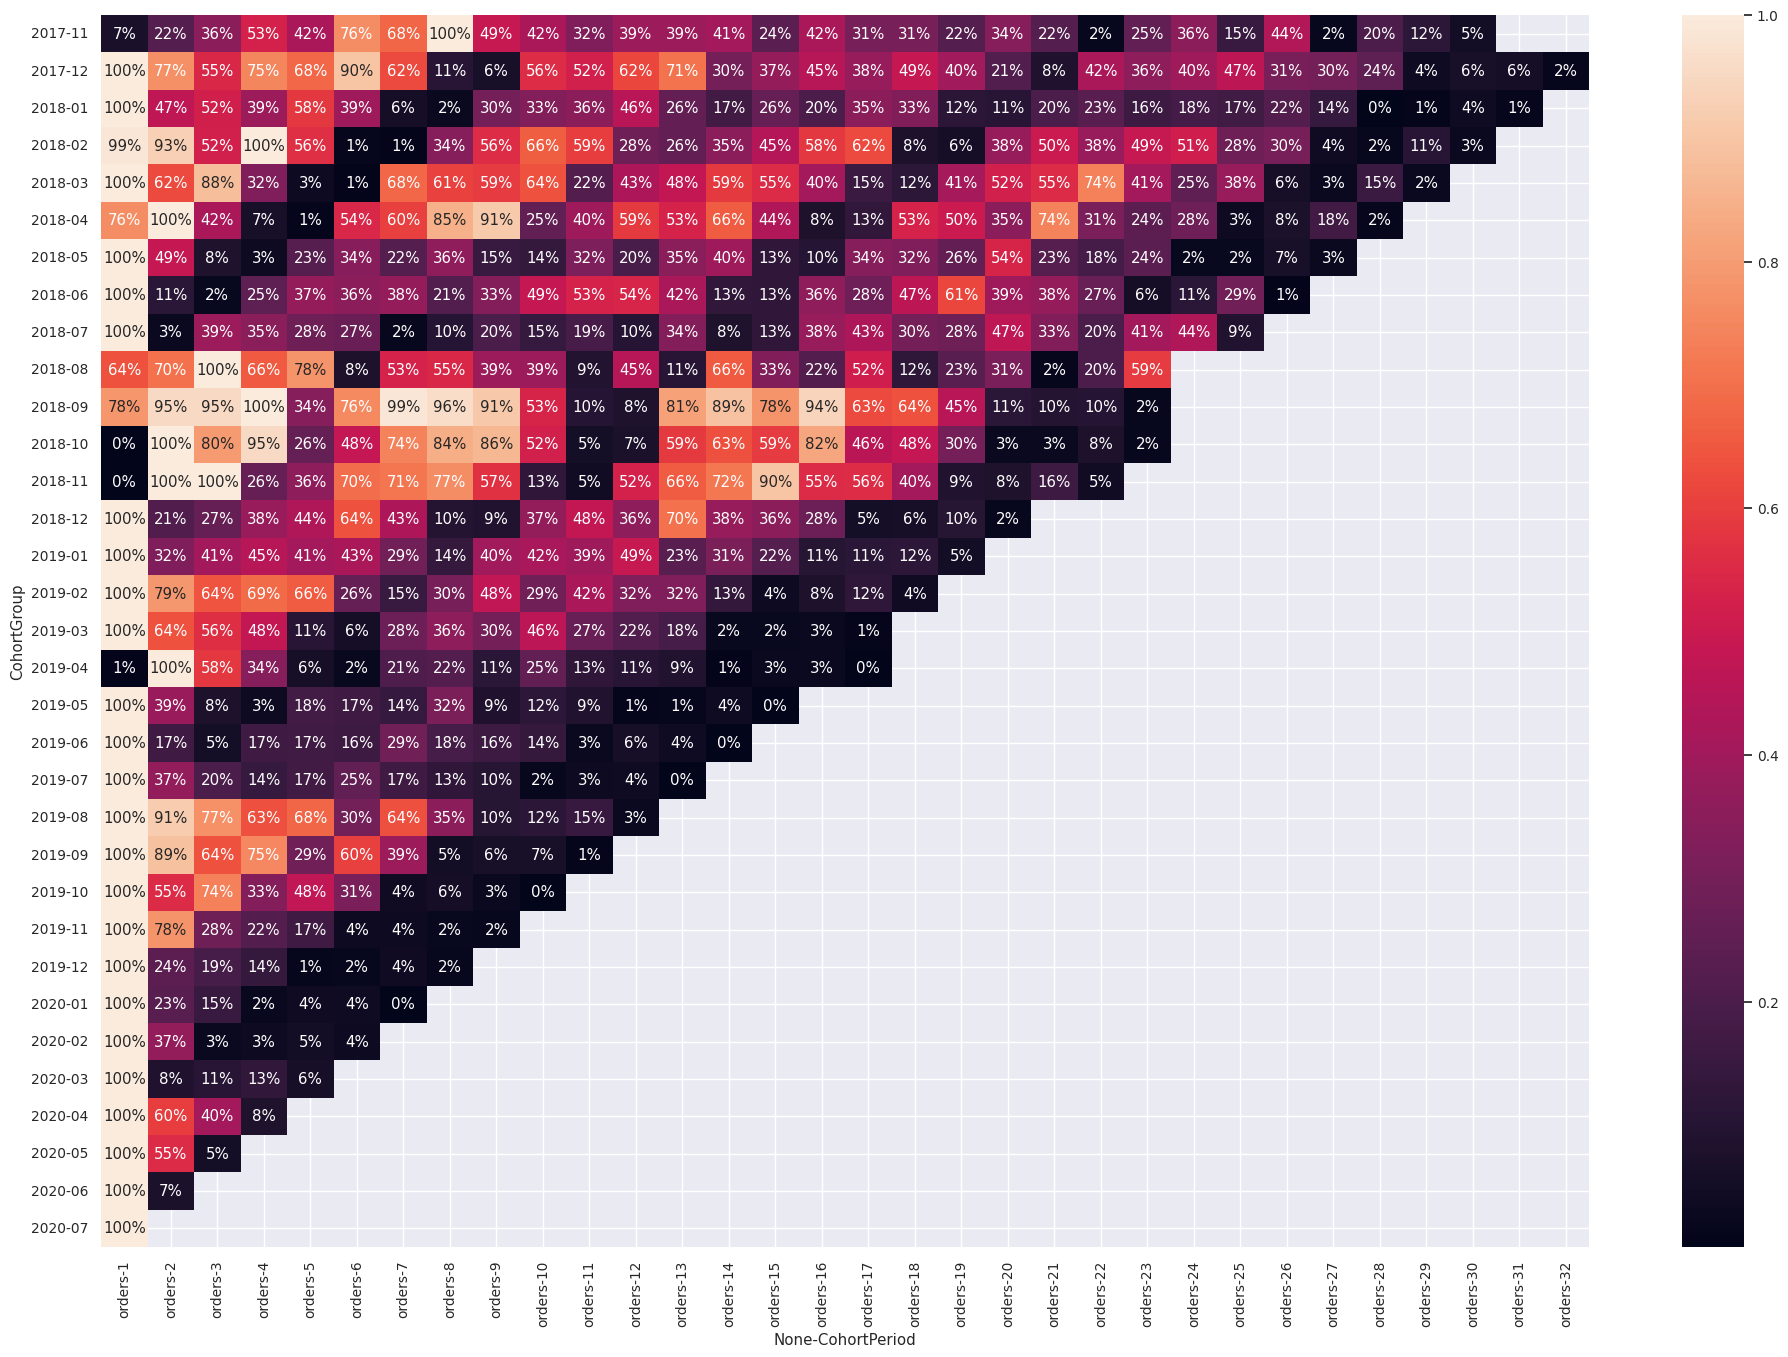

In [74]:
plt.figure(figsize=(24, 16))
sns.set(font_scale=0.9)
sns.heatmap(results_relative, mask=results_relative.isnull(), annot=True, fmt='.0%');

По-моему, просто невероятная красота!! А вы что думаете? :)

#### Вопрос
Вопрос на внимательность: почему иногда значения в первых клетках отличны от 100%?

#### Вопрос

Давайте снова поиграем в аналитиков и ответим на важный вопрос: какие выводы можно извлечь из проделанного когортного анализа?